In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot

%matplotlib inline


In [24]:
df = pd.read_csv(
    './data/final_data.csv', 
    parse_dates=['date'],)

In [25]:
df.sort_values(by='date', inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 559
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                582 non-null    object        
 1   date              582 non-null    datetime64[ns]
 2   drive_time_min    582 non-null    int64         
 3   pause_had_min     582 non-null    int64         
 4   pause_should_min  582 non-null    int64         
 5   total_time_hour   582 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 31.8+ KB


In [27]:
df.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,582,582.000000,582.000000,582.000000,582.000000
mean,2022-04-12 07:22:53.195876096,473.197595,28.977663,33.113402,7.886627
min,2021-02-01 00:00:00,268.000000,0.000000,0.000000,4.466667
25%,2021-08-23 06:00:00,433.000000,28.000000,30.000000,7.216667
50%,2022-03-15 12:00:00,454.500000,30.000000,30.000000,7.575000
75%,2022-11-26 18:00:00,503.000000,31.000000,33.000000,8.383333
max,2023-07-28 00:00:00,731.000000,67.000000,67.000000,12.183333
std,NaN,61.614261,9.950714,6.653783,1.026904


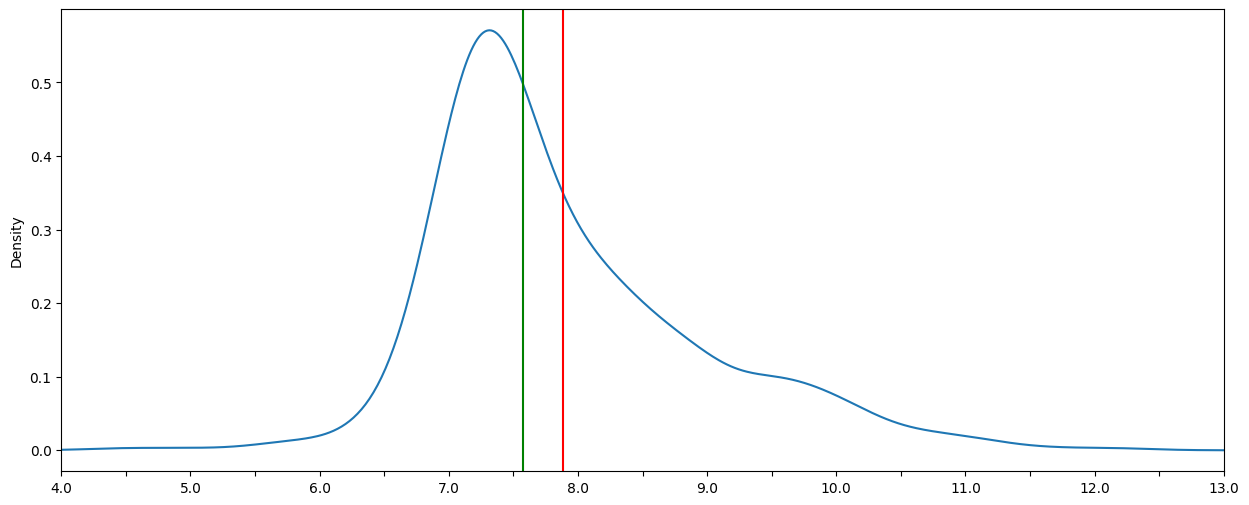

In [28]:
ax = df['total_time_hour'].plot(kind='density', figsize=(15, 6))
ax.axvline(df['total_time_hour'].mean(), color='red')
ax.axvline(df['total_time_hour'].median(), color='green')

ticks = np.arange(4, 14, 0.5)
ax.set_xticks(ticks)

detailed_ticks = [tick if tick % 1 == 0 else '' for tick in ticks]
ax.set_xticklabels(detailed_ticks)

ax.set_xlim(4, 13)

plt.show()


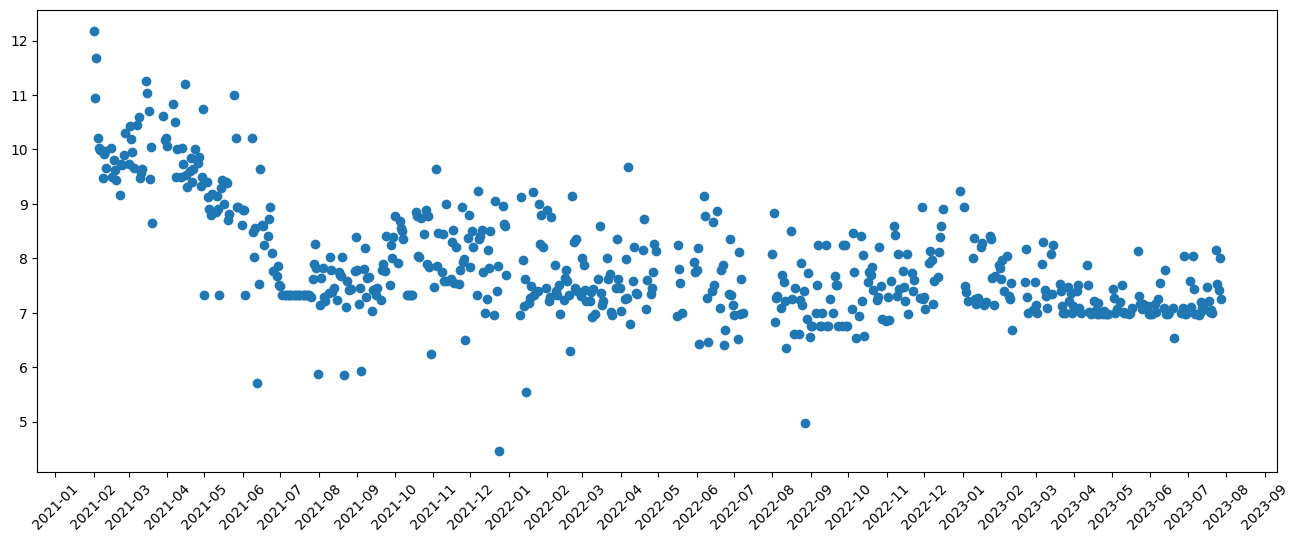

In [29]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(df['date'], df['total_time_hour'])
# Set the x-axis major locator to show months
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

# Set the x-axis date format to show only months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

plt.show()

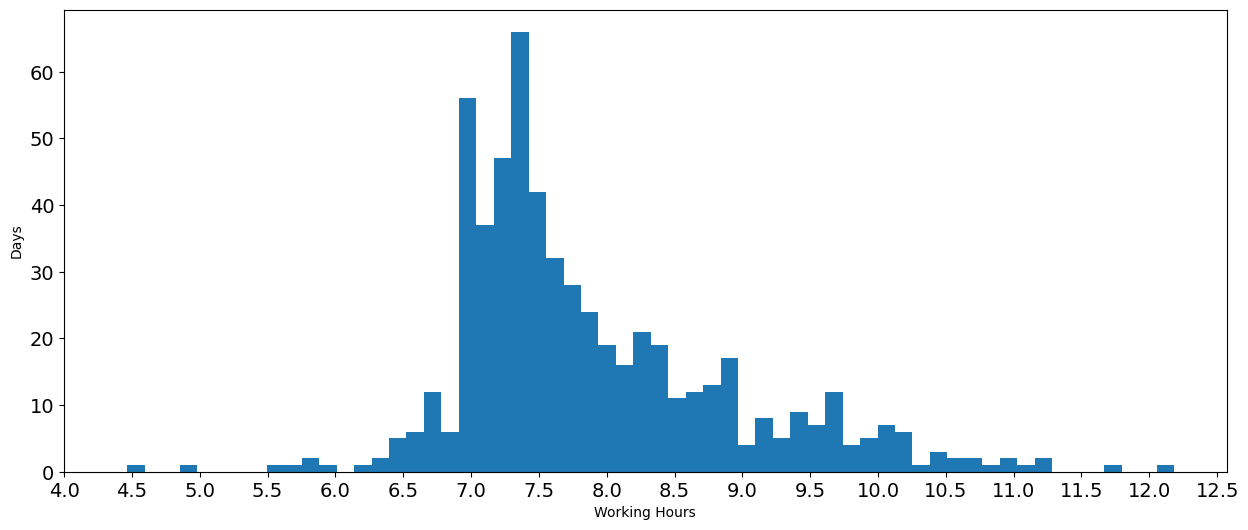

In [30]:
ax = df['total_time_hour'].plot(kind='hist', figsize=(15, 6), bins=60, fontsize=14)
ax.set_ylabel('Days')
ax.set_xlabel('Working Hours')

ticks = np.arange(4, 13, 0.5)
ax.set_xticks(ticks)

detailed_ticks = np.arange(4, 13, 0.5)
ax.set_xticklabels(detailed_ticks)

plt.show()

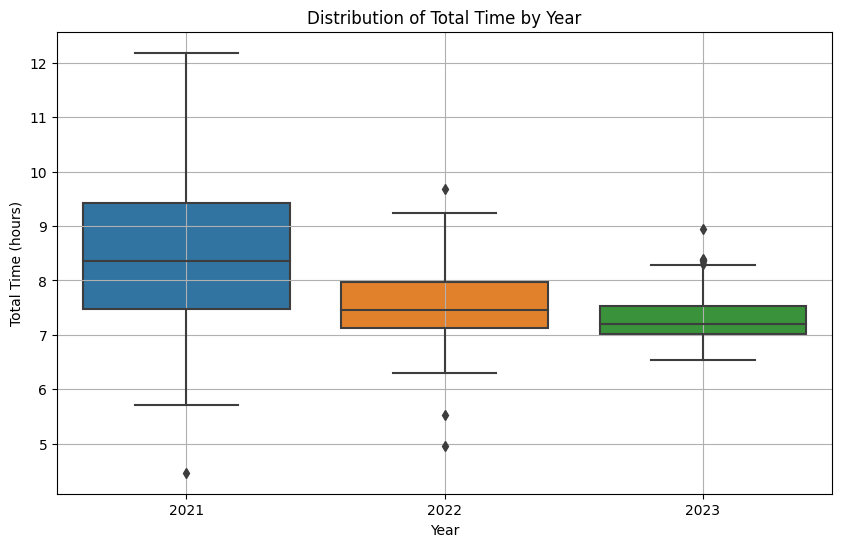

In [31]:
# spread and central tendency of total time for different years.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['date'].dt.year, y=df['total_time_hour'])
plt.xlabel('Year')
plt.ylabel('Total Time (hours)')
plt.title('Distribution of Total Time by Year')
plt.grid(True)
plt.show()

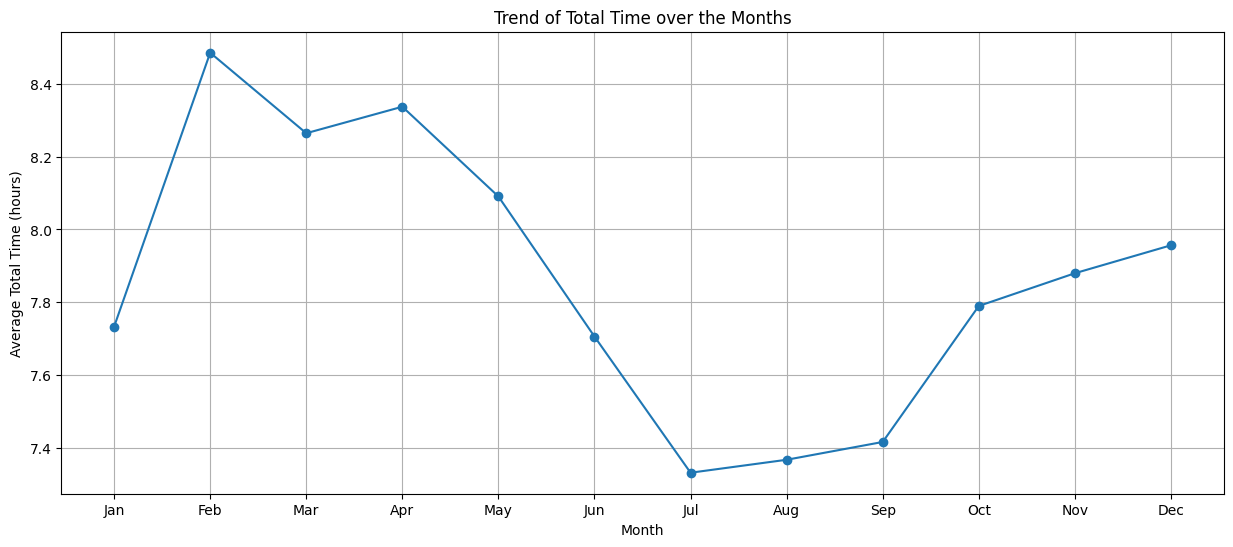

In [32]:
df['month'] = df['date'].dt.month
monthly_avg_total_time = df.groupby('month')['total_time_hour'].mean()

# Create a line chart to show the trend of total_time_hour over the months
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg_total_time.index, monthly_avg_total_time.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Total Time (hours)')
plt.title('Trend of Total Time over the Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

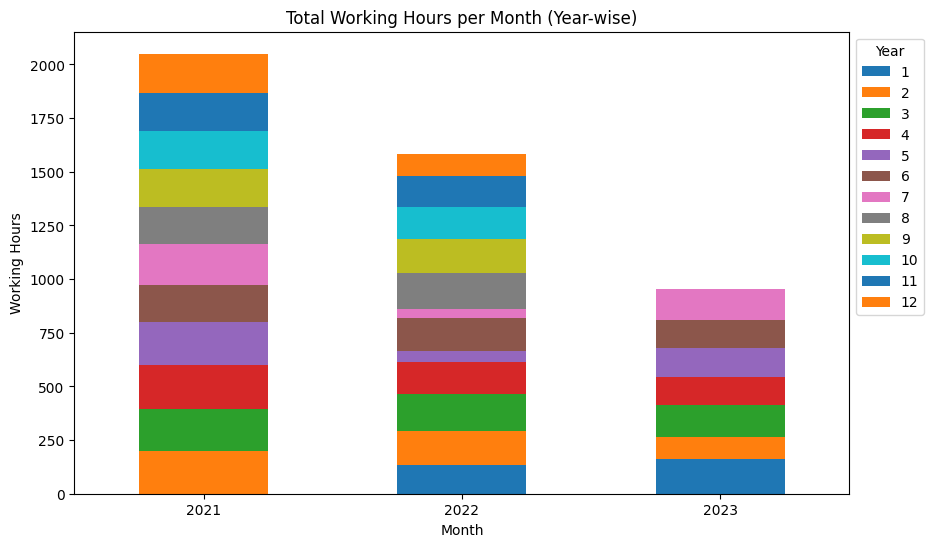

In [33]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
sum_working_hours_per_month = df.groupby(['year', 'month'])['total_time_hour'].sum()
df_result = sum_working_hours_per_month.reset_index()
pivot_result = df_result.pivot_table(index='year', columns='month', values='total_time_hour', fill_value=0)

pivot_result.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Working Hours per Month (Year-wise)')
plt.xlabel('Month')
plt.ylabel('Working Hours')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

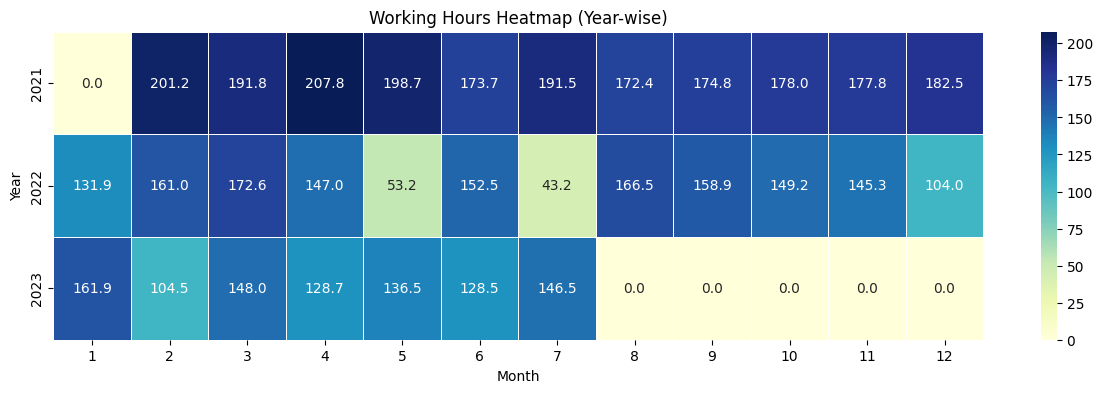

In [34]:
plt.figure(figsize=(15, 4))
sns.heatmap(pivot_result, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Working Hours Heatmap (Year-wise)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

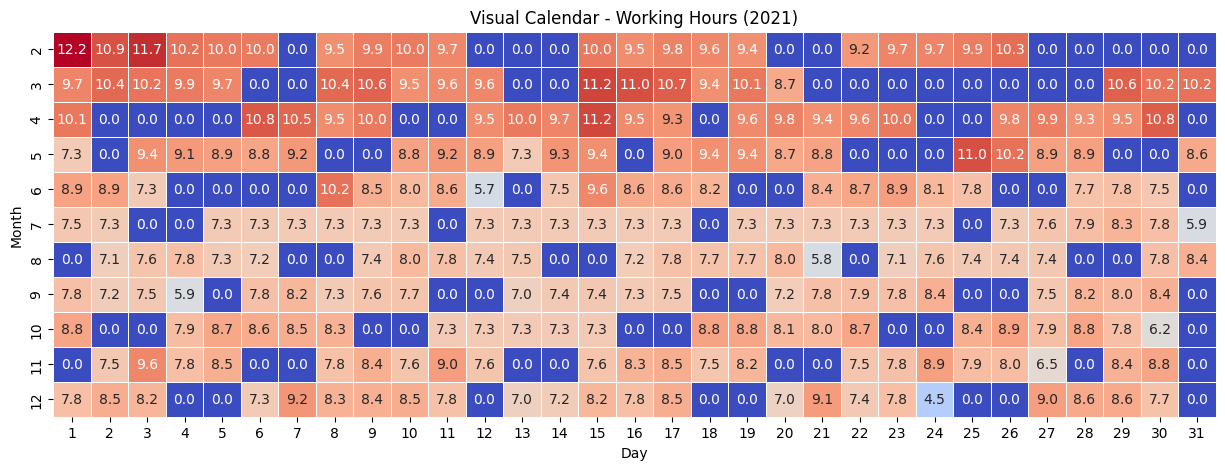

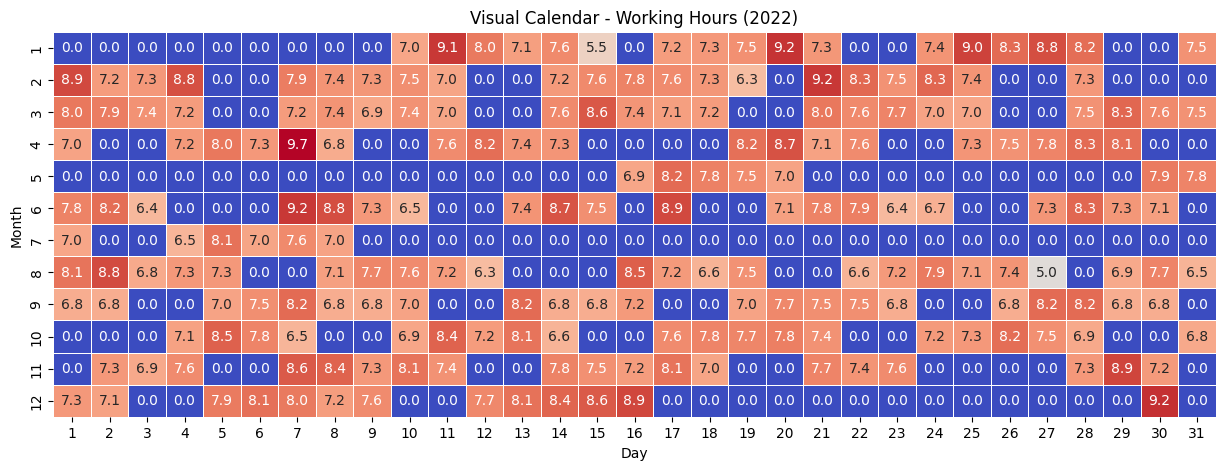

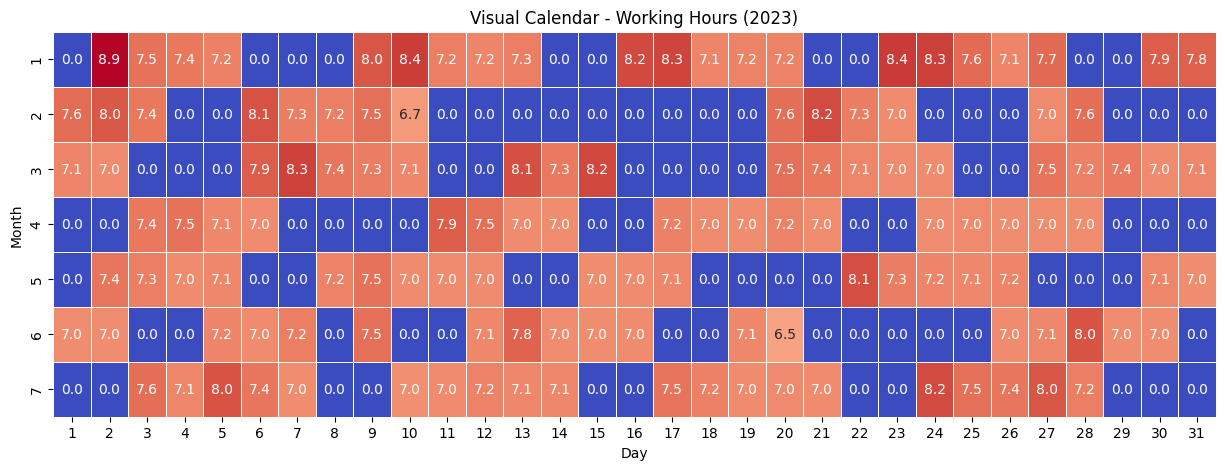

In [35]:
grouped_df = df.groupby(df['date'].dt.year)
# Iterate over each group (year) and create a visual calendar
for year, year_data in grouped_df:
    # Create a DataFrame with all days of the year
    min_date = year_data['date'].min()
    max_date = year_data['date'].max()
    all_dates = pd.date_range(start=min_date, end=max_date)

    # Create a DataFrame for all days of the year
    calendar_df = pd.DataFrame({'date': all_dates})

    # Merge the calendar DataFrame with the actual DataFrame to mark working days
    calendar_df = pd.merge(calendar_df, year_data[['date', 'total_time_hour']], on='date', how='left')

    # Fill NaN (missing values) with 0 to represent free days
    calendar_df['total_time_hour'].fillna(0, inplace=True)

    # Pivot the DataFrame for the heatmap-like visualization
    calendar_pivot = calendar_df.pivot_table(index=calendar_df['date'].dt.month,
                                            columns=calendar_df['date'].dt.day,
                                            values='total_time_hour',
                                            fill_value=0)

    # Set up the figure and plot the heatmap
    plt.figure(figsize=(15, 5))
    sns.heatmap(calendar_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, cbar=False)

    # Set the labels and title
    plt.xlabel('Day')
    plt.ylabel('Month')
    plt.title(f'Visual Calendar - Working Hours ({year})')

    plt.show()

## PMF of working hours
What is probability for working x hours?

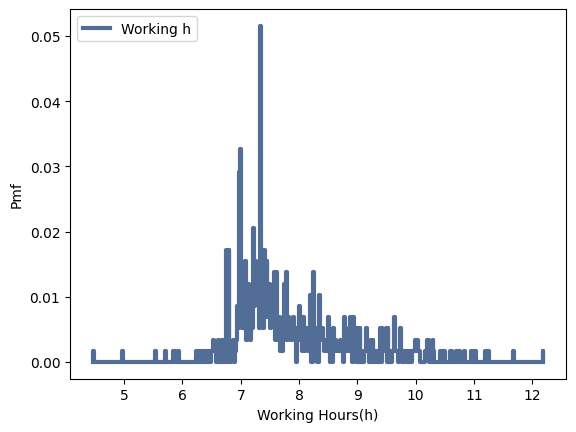

In [36]:
pmf = thinkstats2.Pmf(df.total_time_hour, label='Working h')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Working Hours(h)', ylabel='Pmf',)

## CDF 
cumulative probability of working hours up to a certain value

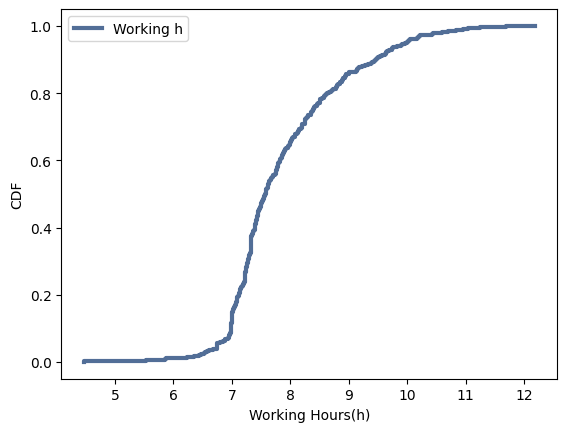

In [37]:
cdf = thinkstats2.Cdf(df.total_time_hour, label='Working h')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Working Hours(h)', ylabel='CDF', loc='upper left')


In [38]:
cdf.Prob(8), cdf.Prob(7.5)

(0.654639175257732, 0.4742268041237113)

In [39]:
print(f'{cdf.Prob(8) * 100}% of working hours are <= less then 8h and {cdf.Prob(7.5) * 100}% <= less then 7:30h')

65.4639175257732% of working hours are <= less then 8h and 47.42268041237113% <= less then 7:30h
